# 5 Ways To Handle Missing Values In Machine Learning Datasets

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import FunctionTransformer

In [2]:
titanic = pd.read_csv("https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv")

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [5]:
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

here columns
age, cabin and embarked has missing values

# Dropping Features prefer than dropping samples(instance)

Pros:
* Complete removal of data with missing values results in robust and highly accurate model
* Deleting a particular row or a column with no specific information is better, since it does not have a high weight age

Cons:

* Loss of information and data
* Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset.

# Replacing With Mean/Median/Mode

In [24]:
titanic.age.mean(), titanic.age.median(), titanic.age.mode()

(29.69911764705882, 28.0, 0    24.0
 dtype: float64)

In [31]:
miss_values = titanic.age.isnull()

In [35]:
titanic.age[miss_values].head(5)

5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: age, dtype: float64

In [38]:
imputer = Imputer(strategy='mean')
age = imputer.fit_transform(titanic[[ 'age', 'fare']])

In [39]:
age[miss_values,0][:5]

array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765])

In [40]:
imputer = Imputer(strategy='median')
age = imputer.fit_transform(titanic[[ 'age', 'fare']])

In [42]:
age[miss_values,0][:5]

array([28., 28., 28., 28., 28.])

In [44]:
imputer = Imputer(strategy='most_frequent')
age = imputer.fit_transform(titanic[[ 'age', 'fare']])

In [45]:
age[miss_values,0][:5]

array([24., 24., 24., 24., 24.])

Pros:

* This is a better approach when the data size is small.
* It can prevent data loss which results in removal of the rows and columns.


Cons:

* Imputing the approximations add variance and bias
* Works poorly compared to other multiple-imputations method


#  Assigning An Unique Category

* A categorical feature will have a definite number of possibilities, such as gender, 
* for example. Since they have a definite number of classes, we can assign another class for the missing values.
* the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’.
* This strategy will add more information into the dataset which will result in the change of variance. 
* Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it. 

In [48]:
titanic['cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: cabin, dtype: object

In [50]:
titanic['cabin'].fillna('U').head()

0       U
1     C85
2       U
3    C123
4       U
Name: cabin, dtype: object

Pros:

* Less possibilities with one extra category, resulting in low variance after one hot encoding since it is categorical.
* Negates the loss of data by adding an unique category.

Cons:

* Adds less variance
* Adds another feature to the model while encoding, which may result in poor performance

# Predicting The Missing Values

* Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. 
* This method may result in better accuracy, unless a missing value is expected to have a very high variance. 
* We will be using linear regression to replace the nulls in the feature ‘age’, using other available features.

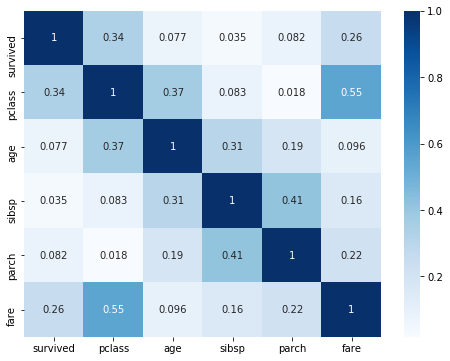

In [91]:
plt.figure(figsize=(8,6))
x = sns.heatmap(abs(titanic.corr()), annot=True, cmap='Blues')

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linreg = LinearRegression()

In [97]:
data_with_null = titanic[['sibsp', 'parch', 'age']]

In [98]:
data_without_null = data_with_null.dropna()


In [99]:
data_with_null.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [101]:
linreg.fit(data_without_null[['sibsp', 'parch']],data_without_null['age'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
age = linreg.predict(data_with_null[['sibsp', 'parch']])


In [108]:
data_with_null.age.fillna(pd.Series(age)).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    32.522347
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

# Using Algorithms Which Support Missing Values

* KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.

* Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

* Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

Pros:

* Does not require creation of a predictive model for each attribute with missing data in the dataset
* Correlation of the data is neglected

Cons:

* Is a very time consuming process and it can be critical in data mining where large databases are being extracted
* Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result